In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

In [3]:
file="/home/pablo/github/DeepIceLearning/h5_final3/File_307.h5"
data = h5py.File(file,'r')
data.keys()

<KeysViewHDF5 ['IC_charge', 'IC_charge_100ns', 'IC_charge_10ns', 'IC_charge_500ns', 'IC_charge_50ns', 'IC_charge_last', 'IC_diff', 'IC_first_charge', 'IC_mean', 'IC_mult', 'IC_num_pulses', 'IC_pulse_0_01_pct_charge_quantile', 'IC_pulse_0_03_pct_charge_quantile', 'IC_pulse_0_05_pct_charge_quantile', 'IC_pulse_0_08_pct_charge_quantile', 'IC_pulse_0_11_pct_charge_quantile', 'IC_pulse_0_15_pct_charge_quantile', 'IC_pulse_0_2_pct_charge_quantile', 'IC_pulse_0_5_pct_charge_quantile', 'IC_pulse_0_8_pct_charge_quantile', 'IC_time_first', 'IC_time_last', 'IC_time_spread', 'IC_time_std', 'IC_time_weighted_median', 'IC_var', 'reco_vals']>

In [4]:
data['IC_mult']

<HDF5 dataset "IC_mult": shape (77, 10, 10, 60, 1), type "<f8">

In [5]:
data["reco_vals"]["true_e"]
x=data["reco_vals"].dtype
#x

In [6]:
sum_charge= np.sum(np.sum(np.sum(data['IC_charge'],axis=1),axis=1),axis=1).flatten()
IC_diff= np.sum(np.sum(np.sum(data['IC_diff'],axis=1),axis=1),axis=1).flatten()

In [7]:
directory="/home/pablo/github/DeepIceLearning/h5_final3"  # "h5_no_filter"      #final2 and final3 have the same athimut distribut among double and cascades
it=0
track_azimuth,track_zenith,true_e,classi,track_length,size=np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])
for filename in os.listdir(directory):
    it=it+1
    if filename.endswith(".h5") and it <10000: 
        path=os.path.join(directory, filename)
        File=h5py.File(path,'r')
        #print(path)
        track_azimuth=np.append(track_azimuth,File["reco_vals"]["true_az"])
        track_zenith=np.append(track_zenith,File["reco_vals"]["true_zen"])
        true_e=np.append(true_e,File["reco_vals"]["true_e"])
        classi=np.append(classi,File["reco_vals"]["classification"])
        track_length=np.append(track_length,File["reco_vals"]["track_length"])
        size=np.append(size,File["reco_vals"]["true_e"].size)

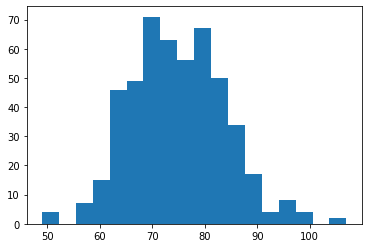

In [8]:
plt.hist(size,18)
plt.show()

In [9]:
np.average(size)

74.85915492957747

In [10]:
74

74

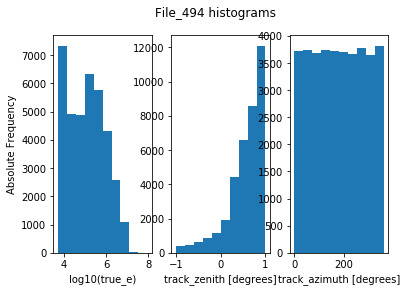

In [11]:
plt.subplot(131)
plt.hist(np.log10(true_e),10)
plt.xlabel('log10(true_e)')
plt.ylabel('Absolute Frequency')

plt.subplot(132)
plt.hist(np.cos(track_zenith),10)
plt.xlabel('track_zenith [degrees]')

plt.subplot(133)
plt.hist(track_azimuth/np.pi*180,10)
plt.xlabel('track_azimuth [degrees]')

plt.suptitle("File_494 histograms")

plt.rcParams['figure.figsize'] = [20, 6]
plt.show()

In [12]:
print("Double bang events:")
print(np.sum(classi==[5]))
print("cascades:")
print(np.sum(classi==[1]))
print("Total number of events")
print(classi.size)

Double bang events:
17501
cascades:
19704
Total number of events
37205


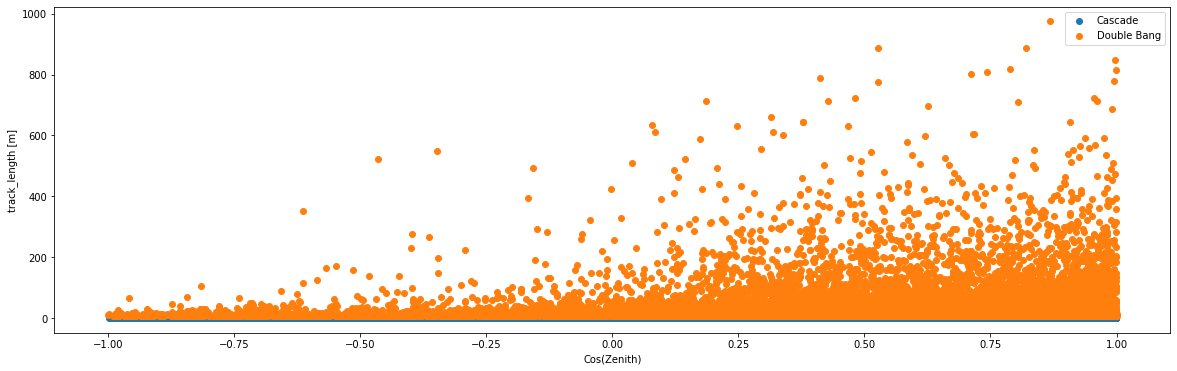

In [13]:
plt.scatter(np.cos(track_zenith[classi==1]),track_length[classi==1],label="Cascade")
plt.scatter(np.cos(track_zenith[classi==5]),track_length[classi==5],label="Double Bang")
plt.ylabel('track_length [m]')
plt.xlabel('Cos(Zenith)')
plt.legend()
plt.show()

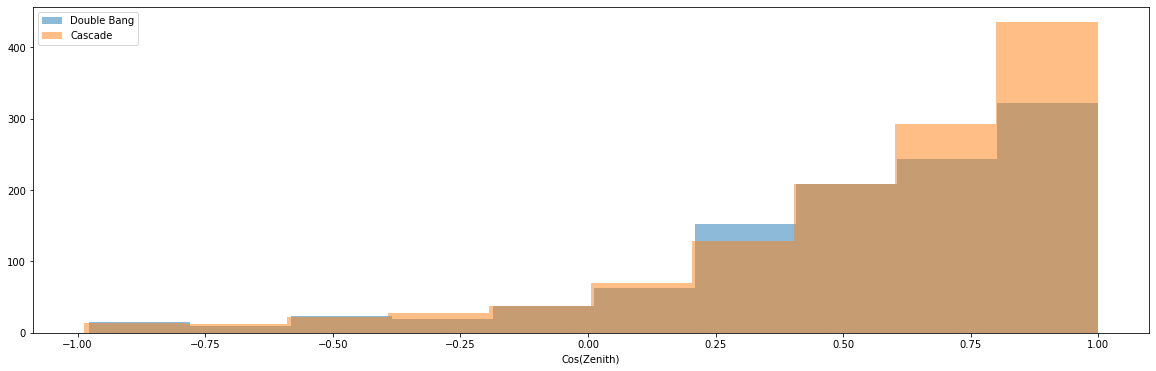

In [18]:
z=track_zenith[classi==5]
t=track_length[classi==5]
plt.hist(np.cos(z[t>5]),alpha = 0.5,label="Double Bang")
plt.hist(np.cos(track_zenith[classi==1]),alpha = 0.5,label="Cascade")
plt.xlabel('Cos(Zenith)')
plt.legend()
plt.show()

In [137]:
z=track_zenith[classi==5]
t=track_length[classi==5]
a=np.histogram(np.cos(z[t>5]))
b=np.histogram(np.cos(track_zenith[classi==1]))
y=b[0]/a[0]

In [138]:
from scipy import optimize

In [139]:
def f(x,a,b,c):
    return a*np.exp(x*b)+c

array([ 2.34136874, -2.21843066,  2.19760958])

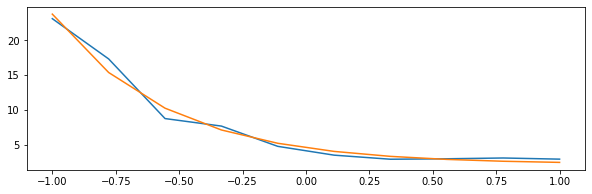

In [184]:

x=np.linspace(-1,1,10)
plt.plot(x,y)
par,mat = optimize.curve_fit(f,x,y)
plt.plot(x,f(x,*par))
par

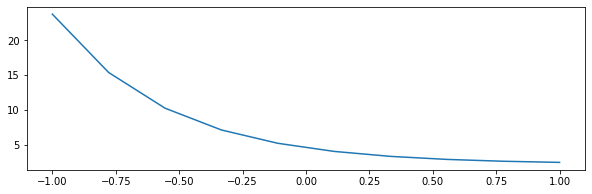

In [282]:
plt.plot(x,f(x, 2.34136874, -2.21843066,  2.19760958))

In [24]:
plt.scatter(np.cos(cascades_zenith),1/f2(np.cos(cascades_zenith)))

NameError: name 'cascades_zenith' is not defined

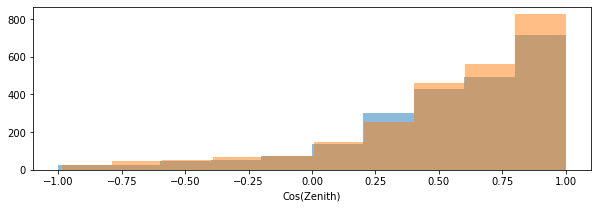

In [303]:
#cascades_cos_zenith=np.cos(track_zenith[classi==1])
cascades_zenith=track_zenith[classi==1]

plt.hist(np.cos(z[t>5]),alpha = 0.5)
f2 = lambda x : (2.34136874*np.exp(-x*2.21843066)) + 2.19760958
condition= (1/f2(np.cos(cascades_zenith)))>(np.random.uniform(0,1,cascades_zenith.size))
#np.logical_and(np.random.uniform(0,1,cascades_zenith.size)<0.34,(cascades_zenith*np.random.uniform(0,1,cascades_zenith.size))>-0.1)
plt.xlabel('Cos(Zenith)')
plt.hist(np.cos(cascades_zenith[ condition ]),alpha = 0.5,bins=10)
plt.show()


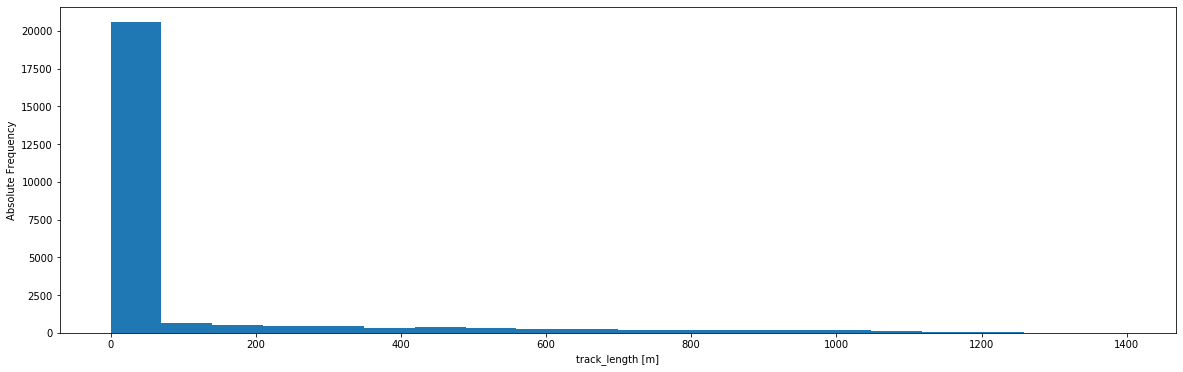

In [16]:
track_length=track_length[track_length>0]
plt.hist(track_length,20)
plt.xlabel('track_length [m]')
plt.ylabel('Absolute Frequency')
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [17]:
track_length=track_length[track_length!=0]
np.min(track_length)

9.370834623473878e-06

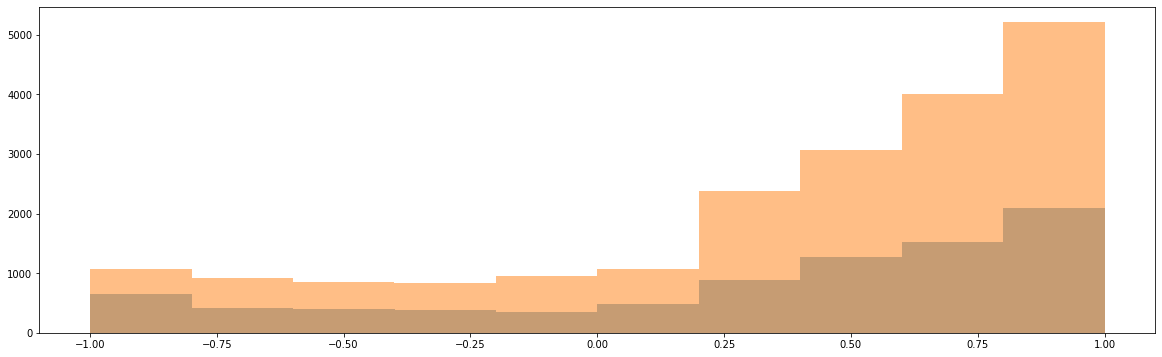

In [47]:
plt.hist(np.cos(track_zenith[classi==1]),alpha = 0.5)
plt.hist(np.cos(track_zenith[classi==5]),alpha = 0.5)
plt.rcParams['figure.figsize'] = [10, 3]
plt.show()